<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/SpecialTopicsML-Winter2022/blob/main/Sumanth_Mahabaleshwar_Bhat_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold

In [ ]:
#load data set
from sklearn.datasets import load_boston
boston = load_boston()
#print(diabetes.DESCR) #run this to see the description of the data set
X_data, t = load_boston(return_X_y=True)

In [ ]:
#split data into trainig set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X_data, t, test_size = 0.2, random_state = 1124)

In [ ]:
def vectorParametersComputation(X,t):
    A = np.matmul(X.T,X)
    B = np.linalg.pinv(A)
    C = np.matmul(X.T,t)
    w = np.matmul(B,C)
    return np.matmul(X,w)

In [ ]:
def rmse(Y,t,N):
    diff_train = np.subtract(Y,t)
    err_train = np.dot(diff_train.T,diff_train)/N
    RMSE_train = np.sqrt(err_train)
    return RMSE_train

In [ ]:
K = 5
kf = KFold(K,True,True)
for train_index, test_index in kf.split(X_train):
    X_trainF, X_testF = X_train[train_index], X_train[test_index]

for train_index, test_index in kf.split(t_train):
    y_trainF, y_testF = t_train[train_index], t_train[test_index]

print(X_trainF.shape)
print(y_trainF.shape)

(324, 13)
(324,)


In [ ]:
def test_errors_plot(n, test_error, error_label):
    alpha_values = list()
    for i in range(0, n):
        alpha_values.append(i)
    plt.plot(alpha_values, test_error, color = 'red', label = 'Test errors')
    plt.legend(loc = "lower right")
    plt.title('K-Fold Cross Validation')
    plt.xlabel('n (Size of the subset of features)')
    plt.ylabel(error_label)
    plt.show()

In [ ]:
def overall_Test_Errors(rmse_test_errors) :
    return sum(rmse_test_errors)*(1/K)

def cross_validation_error(rmse_train_errors):
    return sum(rmse_train_errors)*(1/K)

S0 :  []
RMSE Train Errors :  [24.201755336598392, 21.167650136956684, 17.886136006558335, 23.417093709036095, 12.05518768692559, 7.992947954305487, 14.306827626450314, 13.299085372565612, 19.924689952163693, 15.192153977206239, 10.992817812424184, 9.18334272938983, 18.52339107445513]
RMSE Test Errors :  [23.030411781744565, 18.66397763932173, 17.978464434386055, 22.66490348534491, 12.053216088017646, 7.303812430264773, 15.876548274738871, 11.094278142071955, 19.884767805440557, 15.25436195531095, 10.914504547269082, 9.178047086586691, 17.53044134154317]
Cross Validation Error :  41.62861587500712
Overall Test Error :  40.28554700240819


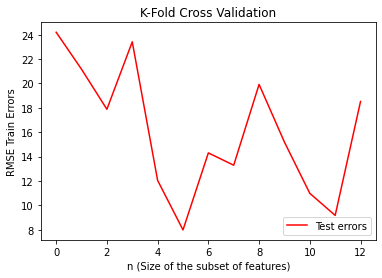

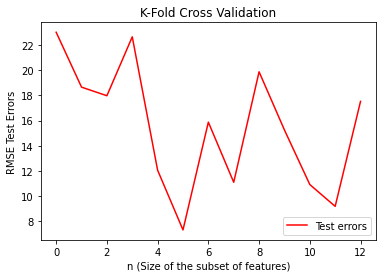

In [ ]:
# To compute cross validation error for S0
X_train_dup = X_trainF
t_train_dup = y_trainF
X_test_dup = X_testF
t_test_dup = y_testF

S0 = []
rmse_train_S0 = []
rmse_test_S0 = []
for i in range(13):
    x = X_train_dup[:,i]
    x = np.append(S0, x)
    x = np.reshape(x, (len(x), 1))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    rmse_train_S0.append(rmse(y, t, len(X_train_dup)))

    x_test = X_test_dup[:,i]
    x_test = np.append(S0, x_test)
    x_test = np.reshape(x_test, (len(x_test), 1))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    rmse_test_S0.append(rmse(y_test, t_test, len(X_test_dup)))

print('S0 : ', S0)
print('RMSE Train Errors : ', rmse_train_S0)
print('RMSE Test Errors : ', rmse_test_S0)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S0))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S0))

test_errors_plot(len(rmse_train_S0), rmse_train_S0, 'RMSE Train Errors')
test_errors_plot(len(rmse_test_S0), rmse_test_S0, 'RMSE Test Errors')

S1 :  [5.875 6.162 6.144 6.618 5.905 5.933 6.015 5.92  6.12  6.122 6.065 8.247
 6.739 5.813 5.966 5.895 6.436 6.193 5.599 6.031 6.25  5.942 6.879 6.402
 5.854 5.859 6.174 7.358 5.782 6.167 6.619 4.138 6.816 6.616 6.059 5.834
 6.249 6.051 6.957 6.383 5.637 7.82  5.952 6.232 5.565 6.358 4.88  6.064
 6.417 5.709 6.226 6.968 6.718 6.812 6.678 5.983 6.372 5.957 6.003 6.434
 5.627 6.943 6.345 6.343 6.461 7.853 6.389 5.569 5.349 5.613 6.525 6.77
 6.193 6.242 6.852 5.885 5.872 5.602 6.176 6.145 6.38  6.066 6.63  6.951
 5.787 6.108 6.326 6.727 7.82  6.108 6.266 7.107 6.219 7.148 6.415 6.301
 6.14  5.949 6.456 6.373 5.85  6.286 5.036 5.604 6.563 7.454 6.998 8.398
 4.903 6.164 6.976 6.112 6.98  7.061 7.024 4.906 6.406 5.155 5.935 4.973
 5.976 6.153 5.019 6.317 5.362 6.279 6.13  7.765 6.781 6.393 5.412 6.826
 5.597 6.696 5.404 4.926 5.39  5.456 6.405 7.155 7.088 8.78  6.122 7.929
 7.412 6.629 6.152 6.03  7.52  5.913 5.468 5.888 5.878 6.162 5.876 6.172
 5.186 6.649 6.749 6.395 6.471 6.041 5.874 7.0

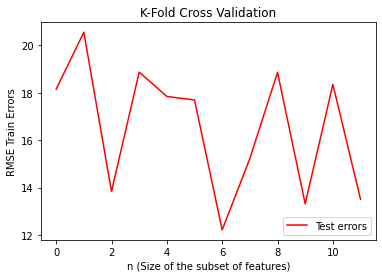

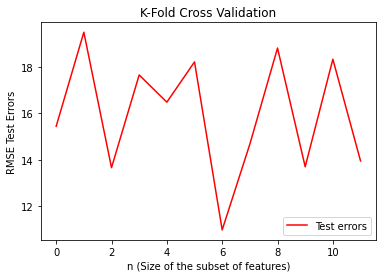

In [ ]:
# To compute cross validation error for S1
# Choosing 6th feature as it has the lowest cross validation error for S0
S1 = X_train_dup[:,5]
X_train_dup = np.delete(X_train_dup,5,1)
S1_test = X_test_dup[:,5]
X_test_dup = np.delete(X_test_dup,5,1)

rmse_train_S1=[]
rmse_test_S1 = []
for i in range(12):
    x = X_train_dup[:,i]
    x = np.append(S1,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S1 = rmse(y,t,len(x))
    rmse_train_S1.append(RMSE_train_S1)

    x_test = X_test_dup[:,i]
    x_test = np.append(S1_test, x_test)
    x_test = np.reshape(x_test, (len(X_test_dup), 2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    rmse_test_S1.append(rmse(y_test, t_test, len(X_test_dup)))

print('S1 : ', S1)
print('RMSE Train Errors : ', rmse_train_S1)
print('RMSE Test Errors : ', rmse_test_S1)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S1))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S1))

test_errors_plot(len(rmse_train_S1), rmse_train_S1, 'RMSE Train Errors')
test_errors_plot(len(rmse_test_S1), rmse_test_S1, 'RMSE Test Errors')

S2 :  [ 2.4259  2.206   2.5979  3.2721  3.1523  3.3603  4.4272  3.9175  2.2875
  2.6403  5.2873  3.6519  6.4798  4.0952  6.8185  5.615   2.3158  1.9356
  4.4546  6.6407  1.7984  1.9669  3.2721  2.2625  1.8956  2.7019  1.6119
  4.148   4.0317  5.4007  5.4007  1.137   8.3248  3.37    4.8122  4.4986
  3.615   2.1678  8.9067  9.1876  1.9799  3.4952  2.8715  5.0141  2.0635
  7.0355  1.5895  4.2392  5.2873  1.6232  8.0555  1.4165  7.8265  4.1007
  5.9604  1.8681  2.3274  1.8026  2.5403  1.8347  1.8172  1.8773  7.8278
  1.5741  2.0026  5.118   4.7794  2.3999  1.7028  1.7572  2.4358  5.7209
  1.7912  3.4242  1.4655  6.498   2.4775  6.0877  2.7301  7.8148  1.9682
  1.7573  5.1167  6.4798  6.6115  8.0555  4.3549  2.7778  4.6947  9.2203
  3.2628  7.309   2.0048  5.1167  4.7211  2.7831  4.0905  4.7075  7.2255
  3.3633  3.9342  4.5026  1.77    2.9879  2.847   6.3361  6.0622  2.2885
  1.3459  3.048   2.1675  2.5091  2.829   3.4106  5.4011  1.1742  2.0651
  1.5894  4.4986  2.5194  2.5806  3.2797  1.4

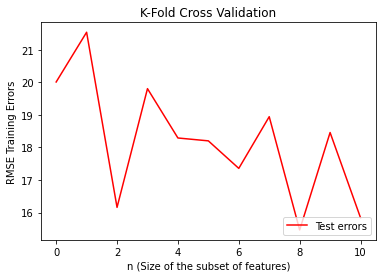

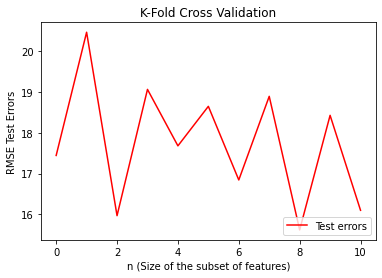

In [ ]:
# To compute cross validation error for S2
S2 = X_train_dup[:,6]
X_train_dup = np.delete(X_train_dup,6,1)
S2_test = X_test_dup[:,6]
X_test_dup = np.delete(X_test_dup,6,1)

rmse_train_S2=[]
rmse_test_S2=[]
for i in range(11):
    x = X_train_dup[:,i]
    x = np.append(S2,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S2 = rmse(y,t,len(x))
    rmse_train_S2.append(RMSE_train_S2)

    x_test = X_test_dup[:,i]
    x_test = np.append(S2_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S2 = rmse(y_test,t_test,len(x_test))
    rmse_test_S2.append(RMSE_test_S2)

print('S2 : ', S2)
print('RMSE Training Errors : ', rmse_train_S2)
print('RMSE Test Errors : ', rmse_test_S2)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S2))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S2))

test_errors_plot(len(rmse_train_S2), rmse_train_S2, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S2), rmse_test_S2, 'RMSE Test Errors')

S3 :  [14.7 20.2 17.8 17.4 20.2 19.2 18.5 18.6 21.  18.4 19.2 17.4 15.2 21.
 19.7 20.2 20.2 20.2 21.  16.9 14.7 21.2 17.4 14.7 20.2 16.6 21.2 17.4
 18.4 19.  19.  20.2 15.1 18.4 20.2 21.  18.2 20.2 19.1 17.3 21.2 18.
 20.2 18.7 20.2 16.6 20.2 18.6 19.2 14.7 19.1 20.2 19.1 14.9 16.  20.1
 21.2 20.2 20.2 20.2 20.2 14.7 14.8 20.2 20.2 14.7 18.5 19.2 20.2 19.1
 20.2 17.9 20.2 20.2 20.2 18.9 17.8 17.9 17.8 19.7 20.2 14.7 19.2 15.2
 16.1 19.1 18.6 20.9 14.9 16.4 18.4 12.6 20.2 19.2 19.6 20.2 18.7 21.
 19.7 16.4 19.2 18.7 20.2 17.8 17.8 15.9 18.7 13.  14.7 17.4 21.  20.2
 17.8 20.2 18.3 20.2 20.2 20.2 21.  18.4 20.2 17.8 21.2 20.2 20.2 18.7
 14.7 17.8 20.9 16.6 18.6 17.6 14.7 17.6 18.6 14.7 19.2 21.  20.2 17.8
 15.3 20.2 14.7 14.7 17.4 20.2 14.7 17.9 13.  17.8 14.7 21.1 18.9 14.7
 16.4 15.2 14.7 20.2 20.2 20.2 20.2 19.6 18.7 20.2 18.  20.2 16.6 20.2
 16.6 13.  20.9 19.6 18.3 14.7 19.7 17.4 20.2 18.  16.9 14.7 20.2 20.2
 15.9 20.2 20.2 16.6 19.1 14.7 15.2 19.  14.7 21.  20.2 20.2 20.2 17.9
 19

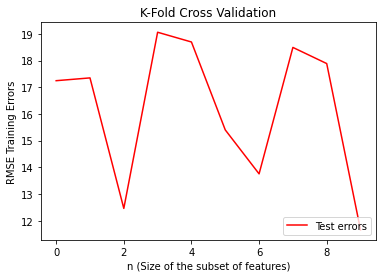

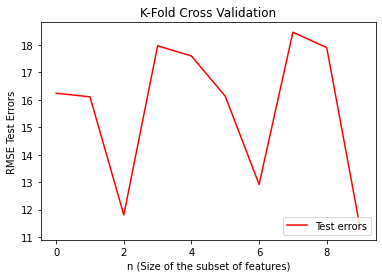

In [ ]:
# To compute cross validation error for S3
S3 = X_train_dup[:,8]
X_train_dup = np.delete(X_train_dup,8,1)
S3_test = X_test_dup[:,8]
X_test_dup = np.delete(X_test_dup,8,1)

rmse_train_S3 = []
rmse_test_S3 = []
for i in range(10):
    x = X_train_dup[:,i]
    x = np.append(S3,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S3 = rmse(y,t,len(x))
    rmse_train_S3.append(RMSE_train_S3)

    x_test = X_test_dup[:,i]
    x_test = np.append(S3_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S3 = rmse(y_test,t_test,len(x_test))
    rmse_test_S3.append(RMSE_test_S3)

print('S3 : ', S3)
print('RMSE Training Errors', rmse_train_S3)
print('RMSE Test Errors', rmse_test_S3)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S3))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S3))

test_errors_plot(len(rmse_train_S3), rmse_train_S3, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S3), rmse_test_S3, 'RMSE Test Errors')

S4 :  [14.43 24.1   9.45  7.6  11.45  9.68 12.86 13.65  9.08  5.98  5.52  3.95
  4.69 19.88 14.44 10.56 16.22 21.52 16.51  7.83  5.5  16.9   9.93 11.32
 23.79  9.64 24.16  4.73 15.94  7.51  7.22 37.97  3.95  8.93  8.51  8.47
 10.59 18.76  3.53  5.77 18.34  3.57 17.15 12.34 17.16 11.22 30.62 14.66
  6.72 15.79 10.15 17.21  6.56  4.85  6.27 18.07 11.12 20.62 21.32 29.05
 22.88  4.59  4.97 20.32 18.05  3.81  9.62 15.1  19.77 27.26 18.13  4.84
 15.17 10.74 19.78  8.79 15.37 16.2  12.04  6.86 24.08  6.43  4.7   5.1
 10.24  9.16 10.97  9.42  3.76  6.57  7.9   8.61 16.59  3.56  6.12 16.23
 10.27  8.26  6.73 10.5   8.77  8.94 25.68 13.98  5.68  3.11  2.94  5.91
 29.29 21.46  5.64 12.67  5.04  7.01  1.98 34.77 19.52 20.08  6.58 12.64
 19.01 13.15 34.41 13.99 10.19 11.97 27.8   7.56  7.67  5.19 29.55  4.16
 21.45  7.18 23.98 29.53 21.14 11.69 19.37  4.82  7.85  5.29 14.1   3.7
  5.25 23.27 15.02 18.8   7.26 16.21 26.42 14.8   8.1   7.43  9.25 19.15
 28.32 23.24 17.44 13.27 17.12  7.7   9.1   2.9

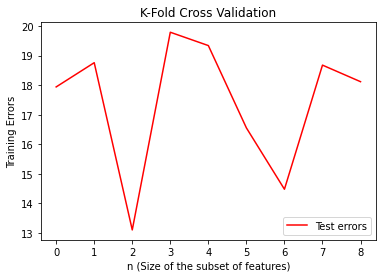

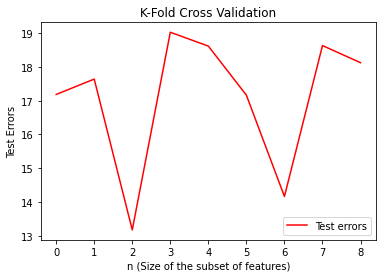

In [ ]:
# To compute cross validation error for S4
S4 = X_train_dup[:,9]
X_train_dup = np.delete(X_train_dup,9,1)
S4_test = X_test_dup[:,9]
X_test_dup = np.delete(X_test_dup,9,1)

rmse_train_S4 = []
rmse_test_S4 = []
for i in range(9):
    x = X_train_dup[:,i]
    x = np.append(S4,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S4 = rmse(y,t,len(x))
    rmse_train_S4.append(RMSE_train_S4)

    x_test = X_test_dup[:,i]
    x_test = np.append(S4_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S4 = rmse(y_test,t_test,len(x_test))
    rmse_test_S4.append(RMSE_test_S4)

print('S4 : ', S4)
print('RMSE Training Errors : ' ,rmse_train_S4)
print('RMSE Test Errors : ' , rmse_test_S4)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S4))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S4))

test_errors_plot(len(rmse_train_S4), rmse_train_S4, 'Training Errors')
test_errors_plot(len(rmse_test_S4), rmse_test_S4, 'Test Errors')

S5 :  [19.58 18.1   2.46  6.2  18.1   5.96  4.49  6.96 11.93  9.9  10.81  6.2
  3.44  8.14  5.13  5.19 18.1  18.1   8.14  6.06 19.58 21.89  6.2  19.58
 18.1   4.05 21.89  6.2   9.9   4.86  4.86 18.1   1.32  2.18  5.19  8.14
 15.04 18.1   5.86  0.74 21.89  2.89 18.1  12.83 18.1   4.93 18.1  10.59
 10.81 19.58  5.86 18.1   5.86  3.33 13.92 27.74 21.89 18.1  18.1  18.1
 18.1  19.58  2.24 18.1  18.1   2.68  4.49  9.69 18.1  25.65 18.1   6.91
 18.1  18.1  18.1   6.07 10.01  6.91 10.01  5.13 18.1  19.58  4.95  3.44
  3.37  5.86 10.59  8.56  3.33  3.64  9.9   1.52 18.1   4.95  7.38 18.1
 12.83  8.14  5.13 13.89  5.96 12.83 18.1   2.46  2.46  3.75  2.18  3.97
 19.58  6.2  11.93 18.1   2.46 18.1   2.95 18.1  18.1  18.1   8.14  9.9
 18.1   2.46 21.89 18.1  18.1  12.83 19.58  2.46  8.56  4.93 10.59  6.41
 19.58  3.78 10.59 19.58  9.69  8.14 18.1   2.46  2.97 18.1  19.58 19.58
  6.2  18.1  19.58  6.91  3.97 10.01 19.58  4.    6.07  2.03  3.64  7.87
 19.58 18.1  18.1  18.1  18.1   7.38 12.83 18.1  

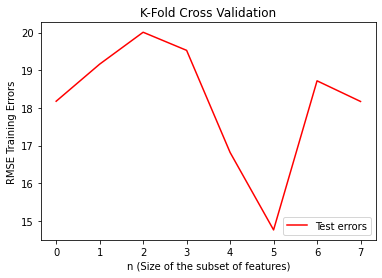

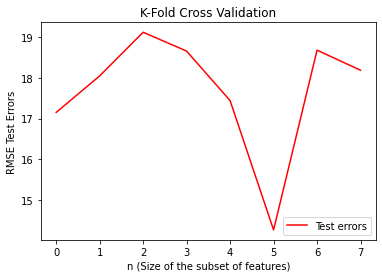

In [ ]:
# To compute cross validation error for S5
S5 = X_train_dup[:,2]
X_train_dup = np.delete(X_train_dup,2,1)
S5_test = X_test_dup[:,2]
X_test_dup = np.delete(X_test_dup,2,1)

rmse_train_S5 = []
rmse_test_S5 = []
for i in range(8):
    x = X_train_dup[:,i]
    x = np.append(S5,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S5 = rmse(y,t,len(x))
    rmse_train_S5.append(RMSE_train_S5)

    x_test = X_test_dup[:,i]
    x_test = np.append(S5_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S5 = rmse(y_test,t_test,len(x_test))
    rmse_test_S5.append(RMSE_test_S5)

print('S5 : ', S5)
print('RMSE Training Errors : ', rmse_train_S5)
print('RMSE Test Errors : ', rmse_test_S5)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S5))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S5))

test_errors_plot(len(rmse_train_S5), rmse_train_S5, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S5), rmse_test_S5, 'RMSE Test Errors')

S6 :  [ 5. 24.  3.  8. 24.  5.  3.  3.  1.  4.  4.  8.  5.  4.  8.  5. 24. 24.
  4.  1.  5.  4.  8.  5. 24.  5.  4.  8.  4.  4.  4. 24.  5.  7.  5.  4.
  4. 24.  7.  2.  4.  2. 24.  5. 24.  6. 24.  4.  4.  5.  7. 24.  7.  5.
  4.  4.  4. 24. 24. 24. 24.  5.  5. 24. 24.  4.  3.  6. 24.  2. 24.  3.
 24. 24. 24.  4.  6.  3.  6.  8. 24.  5.  4.  5.  4.  7.  4.  5.  5.  1.
  4.  2. 24.  4.  5. 24.  5.  4.  8.  5.  5.  5. 24.  3.  3.  3.  3.  5.
  5.  8.  1. 24.  3. 24.  3. 24. 24. 24.  4.  4. 24.  3.  4. 24. 24.  5.
  5.  3.  5.  6.  4.  4.  5.  5.  4.  5.  6.  4. 24.  3.  1. 24.  5.  5.
  8. 24.  5.  3.  5.  6.  5.  3.  4.  2.  1.  5.  5. 24. 24. 24. 24.  5.
  5. 24.  2. 24.  6. 24.  5.  5.  5.  5.  4.  5.  1.  8. 24.  2.  4.  5.
 24. 24.  1. 24.  5.  5.  2.  5.  5.  4.  5.  4. 24. 24. 24.  5.  6.  5.
 24.  4.  3.  4. 24.  4.  5.  4. 24.  2.  5.  5.  4.  2.  1.  5.  7.  2.
  5.  5.  4.  8.  4.  6.  6.  5.  1.  4.  4.  5. 24. 24.  7.  4. 24.  8.
  4.  1.  8.  8.  5.  4.  2.  4.  4.  4.  5. 

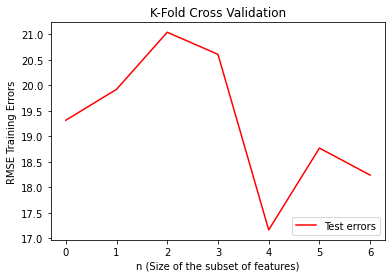

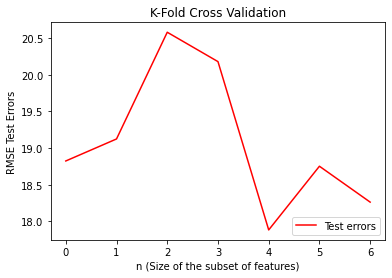

In [ ]:
# To compute cross validation error for S6
S6 = X_train_dup[:,5]
X_train_dup = np.delete(X_train_dup,5,1)
S6_test = X_test_dup[:,5]
X_test_dup = np.delete(X_test_dup,5,1)

rmse_train_S6 = []
rmse_test_S6 = []
for i in range(7):
    x = X_train_dup[:,i]
    x = np.append(S6,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S6 = rmse(y,t,len(x))
    rmse_train_S6.append(RMSE_train_S6)

    x_test = X_test_dup[:,i]
    x_test = np.append(S6_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S6 = rmse(y_test,t_test,len(x_test))
    rmse_test_S6.append(RMSE_test_S6)

print('S6 : ', S6)
print('RMSE Training Errors : ', rmse_train_S6)
print('RMSE Test Errors : ', rmse_test_S6)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S6))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S6))

test_errors_plot(len(rmse_train_S6), rmse_train_S6, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S6), rmse_test_S6, 'RMSE Test Errors')

S7 :  [ 94.6  97.4  62.2  80.8  53.2  68.2  45.1  61.5  76.7  52.8   7.8  70.4
  30.8 100.   93.4  59.6  87.9  78.1  85.7  23.3  92.6  93.5  77.7  95.2
  96.6  68.7  93.6  71.6  71.7  46.7  70.4 100.   40.5  58.1  37.3  56.5
  77.3  82.5   6.8  35.7  94.7  36.9  84.7  53.7  70.6  52.9 100.   59.1
   6.6  98.5  79.2  91.9  17.5  32.2  31.1  98.8  97.9 100.   94.5 100.
  93.9  97.4  20.1 100.   93.3  33.2  48.   73.5  96.   95.6  86.5   2.9
  92.6  64.7 100.   33.   73.1  62.   72.5  29.2  95.6 100.   23.4  21.5
  31.1  34.9  52.5  79.9  64.5  32.   82.8  36.6 100.   27.7  40.1  83.7
  45.8  61.8  67.8  92.4  41.5  45.   97.   89.8  95.6  34.2  45.8  91.5
  97.8  91.3  91.   81.3  58.4  77.   15.8 100.   97.2 100.   29.3  37.8
  87.9  68.8 100.   83.   96.2  74.5 100.   83.3  71.3   7.8   9.8  27.6
  94.9  56.4  88.6  95.7  72.9  36.6  96.   92.2  20.8  82.9  97.3  96.2
  76.9  94.6  82.6  85.5  89.4  92.9 100.   47.6  21.4  38.4  19.1  96.1
  93.8  93.3  92.6  91.   98.8  49.9  36.6  97

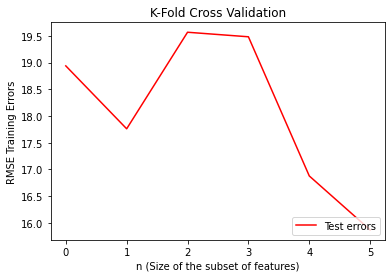

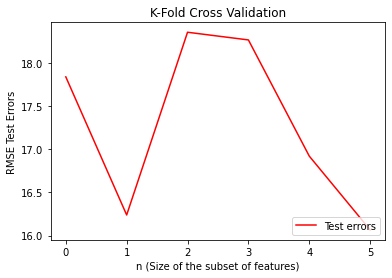

In [ ]:
# To compute cross validation error for S7
S7 = X_train_dup[:,4]
X_train_dup = np.delete(X_train_dup,4,1)
S7_test = X_test_dup[:,4]
X_test_dup = np.delete(X_test_dup,4,1)

rmse_train_S7 = []
rmse_test_S7 = []
for i in range(6):
    x = X_train_dup[:,i]
    x = np.append(S7,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S7 = rmse(y,t,len(x))
    rmse_train_S7.append(RMSE_train_S7)

    x_test = X_test_dup[:,i]
    x_test = np.append(S7_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S7 = rmse(y_test,t_test,len(x_test))
    rmse_test_S7.append(RMSE_test_S7)

print('S7 : ', S7)
print('RMSE Training Errors : ', rmse_train_S7)
print('RMSE Test Errors : ', rmse_test_S7)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S7))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S7))

test_errors_plot(len(rmse_train_S7), rmse_train_S7, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S7), rmse_test_S7, 'RMSE Test Errors')

S8 :  [2.9229e+02 3.0276e+02 3.9690e+02 3.9690e+02 3.8822e+02 3.9690e+02
 3.9599e+02 3.9134e+02 3.9690e+02 3.9690e+02 3.9091e+02 3.7895e+02
 3.8971e+02 3.9454e+02 3.7808e+02 3.9481e+02 1.0019e+02 9.6730e+01
 3.0342e+02 3.6225e+02 3.3892e+02 3.7825e+02 3.9039e+02 3.3004e+02
 2.4052e+02 3.9323e+02 3.8808e+02 3.9007e+02 3.9690e+02 3.9064e+02
 3.9563e+02 3.9690e+02 3.9290e+02 3.9336e+02 3.9614e+02 3.9562e+02
 3.9690e+02 3.7838e+02 3.8609e+02 3.9690e+02 3.9690e+02 3.9353e+02
 2.2010e+01 3.8640e+02 3.6500e+00 3.7275e+02 3.7292e+02 3.8132e+02
 3.8373e+02 2.6195e+02 3.7614e+02 3.9690e+02 3.9374e+02 3.9690e+02
 3.9690e+02 3.9011e+02 3.8576e+02 1.6450e+01 3.3129e+02 2.7250e+01
 3.9690e+02 3.6343e+02 3.6824e+02 3.9690e+02 2.7490e+01 3.9278e+02
 3.9690e+02 3.9577e+02 3.9690e+02 3.5929e+02 5.0920e+01 3.8541e+02
 3.9690e+02 3.9690e+02 1.7936e+02 3.9690e+02 3.3863e+02 3.9690e+02
 3.9330e+02 3.9068e+02 6.0720e+01 3.5389e+02 3.9690e+02 3.7768e+02
 3.9690e+02 3.9018e+02 3.9487e+02 3.9476e+02 3.8731e+02 

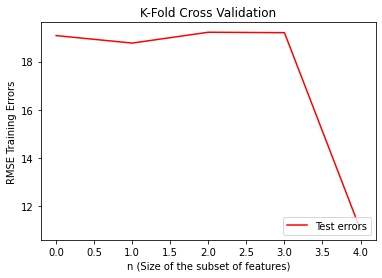

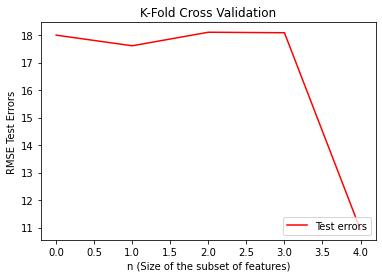

In [ ]:
# To compute cross validation error for S8
S8 = X_train_dup[:,5]
X_train_dup = np.delete(X_train_dup,5,1)
S8_test = X_test_dup[:,5]
X_test_dup = np.delete(X_test_dup,5,1)

rmse_train_S8=[]
rmse_test_S8=[]
for i in range(5):
    x = X_train_dup[:,i]
    x = np.append(S8,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S8 = rmse(y,t,len(x))
    rmse_train_S8.append(RMSE_train_S8)

    x_test = X_test_dup[:,i]
    x_test = np.append(S8_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S8 = rmse(y_test,t_test,len(x_test))
    rmse_test_S8.append(RMSE_test_S8)

print('S8 : ', S8)
print('RMSE Training Errors : ', rmse_train_S8)
print('RMSE Test Errors : ', rmse_test_S8)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S8))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S8))

test_errors_plot(len(rmse_train_S8), rmse_train_S8, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S8), rmse_test_S8, 'RMSE Test Errors')

S9 :  [403. 666. 193. 307. 666. 279. 247. 223. 273. 304. 305. 307. 398. 307.
 284. 224. 666. 666. 307. 304. 403. 437. 307. 403. 666. 296. 437. 307.
 304. 281. 281. 666. 256. 222. 224. 307. 270. 666. 330. 313. 437. 276.
 666. 398. 666. 300. 666. 277. 305. 403. 330. 666. 330. 216. 289. 711.
 437. 666. 666. 666. 666. 403. 358. 666. 666. 224. 247. 391. 666. 188.
 666. 233. 666. 666. 666. 345. 432. 233. 432. 284. 666. 403. 245. 398.
 337. 330. 277. 384. 216. 315. 304. 329. 666. 245. 287. 666. 398. 307.
 284. 276. 279. 398. 666. 193. 193. 244. 222. 264. 403. 307. 273. 666.
 193. 666. 252. 666. 666. 666. 307. 304. 666. 193. 437. 666. 666. 398.
 403. 193. 384. 300. 277. 254. 403. 370. 277. 403. 391. 307. 666. 193.
 285. 666. 403. 403. 307. 666. 403. 233. 264. 432. 403. 469. 345. 348.
 315. 311. 403. 666. 666. 666. 666. 287. 398. 666. 276. 666. 300. 666.
 296. 264. 384. 287. 411. 403. 335. 307. 666. 276. 430. 403. 666. 666.
 422. 666. 224. 296. 188. 403. 311. 281. 403. 307. 666. 666. 666. 226.


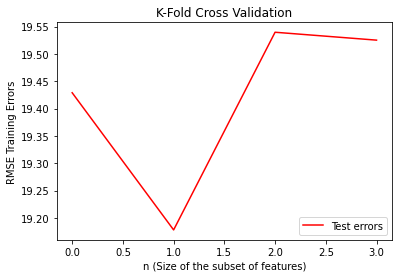

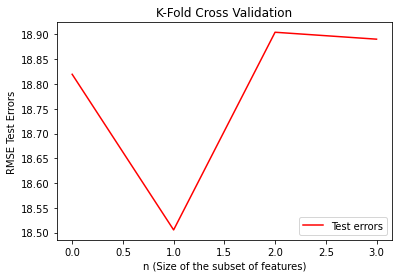

In [ ]:
# To compute cross validation error for S9
S9 = X_train_dup[:,4]
X_train_dup = np.delete(X_train_dup,4,1)
S9_test = X_test_dup[:,4]
X_test_dup = np.delete(X_test_dup,4,1)

rmse_train_S9=[]
rmse_test_S9=[]
for i in range(4):
    x = X_train_dup[:,i]
    x = np.append(S9,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S9 = rmse(y,t,len(x))
    rmse_train_S9.append(RMSE_train_S9)

    x_test = X_test_dup[:,i]
    x_test = np.append(S9_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S9 = rmse(y_test,t_test,len(x_test))
    rmse_test_S9.append(RMSE_test_S9)

print('S9 : ', S9)
print('RMSE Training Errors : ', rmse_train_S9)
print('RMSE Test Errors : ', rmse_test_S9)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S9))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S9))

test_errors_plot(len(rmse_train_S9), rmse_train_S9, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S9), rmse_test_S9, 'RMSE Test Errors')

S10 :  [  0.    0.    0.    0.    0.    0.    0.   20.    0.    0.    0.    0.
  45.    0.   25.    0.    0.    0.    0.   35.    0.    0.    0.    0.
   0.    0.    0.    0.    0.   25.   25.    0.  100.   33.    0.    0.
  28.    0.   22.   85.    0.    0.    0.    0.    0.   30.    0.    0.
   0.    0.   22.    0.   22.   20.    0.    0.    0.    0.    0.    0.
   0.    0.   70.    0.    0.   95.    0.    0.    0.    0.    0.    0.
   0.    0.    0.   12.5   0.    0.    0.   25.    0.    0.   80.   45.
  80.   22.    0.    0.   20.   80.    0.   80.    0.   80.    0.    0.
   0.    0.   25.    0.    0.    0.    0.    0.    0.   90.    0.   20.
   0.    0.    0.    0.    0.    0.   75.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.   30.    0.   40.
   0.   55.    0.    0.    0.    0.    0.    0.   90.    0.    0.    0.
   0.    0.    0.    0.   20.    0.    0.   75.   12.5  82.5  80.   12.5
   0.    0.    0.    0.    0.    0.    0.    0.    0.   

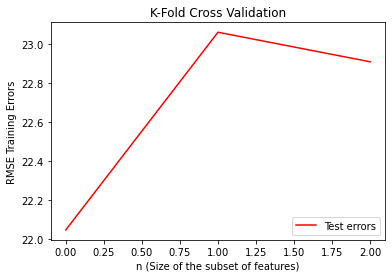

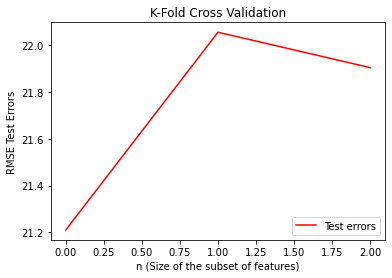

In [ ]:
# To compute cross validation error for S10
S10 = X_train_dup[:,1]
X_train_dup = np.delete(X_train_dup,1,1)
S10_test = X_test_dup[:,1]
X_test_dup = np.delete(X_test_dup,1,1)

rmse_train_S10 = []
rmse_test_S10 = []
for i in range(3):
    x = X_train_dup[:,i]
    x = np.append(S10,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S10 = rmse(y,t,len(x))
    rmse_train_S10.append(RMSE_train_S10)

    x_test = X_test_dup[:,i]
    x_test = np.append(S10_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S10 = rmse(y_test,t_test,len(x_test))
    rmse_test_S10.append(RMSE_test_S10)

print('S10 : ', S10)
print('RMSE Training Errors : ', rmse_train_S10)
print('RMSE Test Errors : ', rmse_test_S10)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S10))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S10))

test_errors_plot(len(rmse_train_S10), rmse_train_S10, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S10), rmse_test_S10, 'RMSE Test Errors')

S11 :  [1.20742e+00 6.39312e+00 6.88800e-02 6.14700e-01 4.83567e+00 6.41700e-02
 5.18800e-02 9.06500e-02 4.52700e-02 7.90410e-01 9.16400e-02 3.31470e-01
 6.91100e-02 9.88430e-01 1.71710e-01 3.04100e-02 5.58107e+00 7.36711e+00
 8.40540e-01 3.46600e-02 1.27346e+00 3.22640e-01 6.23560e-01 2.44953e+00
 1.28023e+01 8.44700e-02 2.90900e-01 5.11830e-01 2.45220e-01 3.55100e-02
 4.46200e-02 1.84982e+01 1.43200e-02 5.47900e-02 3.30600e-02 6.27390e-01
 4.29400e-02 5.29305e+00 8.22100e-02 2.05500e-02 8.81250e-01 8.18700e-02
 3.77498e+00 5.64600e-02 8.79212e+00 1.02900e-01 1.43337e+01 1.35870e-01
 8.82600e-02 2.14918e+00 1.96570e-01 8.89762e+01 1.90730e-01 2.10380e-01
 1.29320e-01 1.05740e-01 5.90050e-01 7.35341e+01 4.42228e+00 1.80846e+01
 9.39063e+00 1.22358e+00 6.46600e-02 1.42362e+01 1.44208e+01 3.51000e-02
 5.05900e-02 1.77830e-01 2.48017e+01 3.87350e-01 4.75237e+00 1.27440e-01
 8.64476e+00 5.82401e+00 1.44383e+01 1.28160e-01 1.30580e-01 2.19770e-01
 1.31580e-01 1.54450e-01 9.33889e+00 1.34284

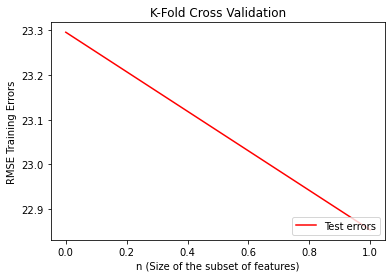

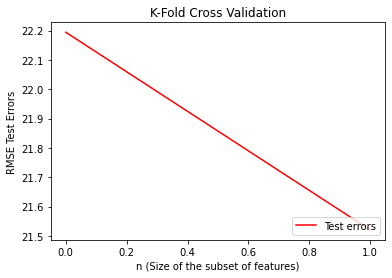

In [ ]:
# To compute cross validation error for S11
S11 = X_train_dup[:,0]
X_train_dup = np.delete(X_train_dup,0,1)
S11_test = X_test_dup[:,0]
X_test_dup = np.delete(X_test_dup,0,1)

rmse_train_S11=[]
rmse_test_S11=[]
for i in range(2):
    x = X_train_dup[:,i]
    x = np.append(S11,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S11 = rmse(y,t,len(x))
    rmse_train_S11.append(RMSE_train_S11)

    x_test = X_test_dup[:,i]
    x_test = np.append(S11_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S11 = rmse(y_test,t_test,len(x_test))
    rmse_test_S11.append(RMSE_test_S11)

print('S11 : ', S11)
print('RMSE Training Errors : ', rmse_train_S11)
print('RMSE Test Errors : ', rmse_test_S11)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S11))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S11))

test_errors_plot(len(rmse_train_S11), rmse_train_S11, 'RMSE Training Errors')
test_errors_plot(len(rmse_test_S11), rmse_test_S11, 'RMSE Test Errors')

S12 :  [0.605  0.584  0.488  0.507  0.583  0.499  0.449  0.464  0.573  0.544
 0.413  0.507  0.437  0.538  0.453  0.515  0.713  0.679  0.538  0.4379
 0.605  0.624  0.507  0.605  0.74   0.51   0.624  0.507  0.544  0.426
 0.426  0.668  0.411  0.472  0.515  0.538  0.464  0.7    0.431  0.41
 0.624  0.445  0.655  0.437  0.584  0.428  0.7    0.489  0.413  0.871
 0.431  0.671  0.431  0.4429 0.437  0.609  0.624  0.679  0.584  0.679
 0.74   0.605  0.4    0.693  0.74   0.4161 0.449  0.585  0.693  0.581
 0.713  0.448  0.693  0.532  0.597  0.409  0.547  0.448  0.547  0.453
 0.679  0.605  0.411  0.437  0.398  0.431  0.489  0.52   0.4429 0.392
 0.544  0.404  0.74   0.411  0.493  0.713  0.437  0.538  0.453  0.55
 0.499  0.437  0.7    0.488  0.488  0.394  0.458  0.647  0.871  0.507
 0.573  0.77   0.488  0.532  0.428  0.668  0.74   0.597  0.538  0.544
 0.713  0.488  0.624  0.713  0.77   0.437  0.871  0.488  0.52   0.428
 0.489  0.447  0.871  0.484  0.489  0.871  0.585  0.538  0.693  0.488
 0.4    0.718 

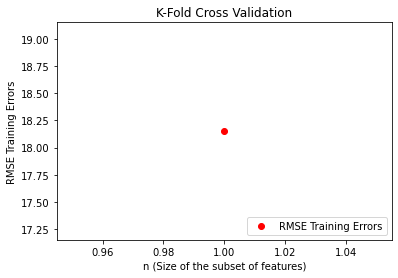

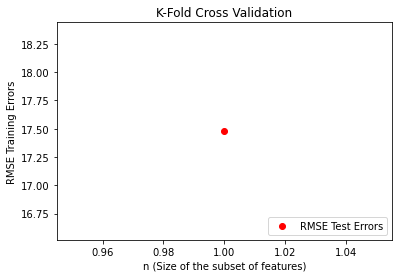

In [ ]:
# To compute cross validation error for S12
S12 = X_train_dup[:,1]
X_train_dup = np.delete(X_train_dup,1,1)
S12_test = X_test_dup[:,1]
X_test_dup = np.delete(X_test_dup,1,1)

rmse_train_S12 = []
rmse_test_S12 = []
for i in range(1):
    x = X_train_dup[:,i]
    x = np.append(S12,x)
    x = np.reshape(x,(len(X_train_dup),2))
    t = t_train_dup
    y = vectorParametersComputation(x,t)
    RMSE_train_S12 = rmse(y,t,len(x))
    rmse_train_S12.append(RMSE_train_S12)

    x_test = X_test_dup[:,i]
    x_test = np.append(S12_test,x_test)
    x_test = np.reshape(x_test,(len(X_test_dup),2))
    t_test = t_test_dup
    y_test = vectorParametersComputation(x_test,t_test)
    RMSE_test_S12 = rmse(y_test,t_test,len(x_test))
    rmse_test_S12.append(RMSE_test_S12)

print('S12 : ', S12)
print('RMSE Training Errors : ', rmse_train_S12)
print('RMSE Test Errors : ', rmse_test_S12)
print('Cross Validation Error : ', cross_validation_error(rmse_train_S12))
print('Overall Test Error : ', overall_Test_Errors(rmse_test_S12))

plt.scatter(1, rmse_train_S12, color = 'red', label = 'RMSE Training Errors')
plt.legend(loc = "lower right")
plt.title('K-Fold Cross Validation')
plt.xlabel('n (Size of the subset of features)')
plt.ylabel('RMSE Training Errors')
plt.show()

plt.scatter(1, rmse_test_S12, color = 'red', label = 'RMSE Test Errors')
plt.legend(loc = "lower right")
plt.title('K-Fold Cross Validation')
plt.xlabel('n (Size of the subset of features)')
plt.ylabel('RMSE Training Errors')
plt.show()

In [ ]:
# Cross validation errors of S0 to S12

cross_val_errors = list()
cross_val_errors.append(cross_validation_error(rmse_train_S0))
cross_val_errors.append(cross_validation_error(rmse_train_S1))
cross_val_errors.append(cross_validation_error(rmse_train_S2))
cross_val_errors.append(cross_validation_error(rmse_train_S3))
cross_val_errors.append(cross_validation_error(rmse_train_S4))
cross_val_errors.append(cross_validation_error(rmse_train_S5))
cross_val_errors.append(cross_validation_error(rmse_train_S6))
cross_val_errors.append(cross_validation_error(rmse_train_S7))
cross_val_errors.append(cross_validation_error(rmse_train_S8))
cross_val_errors.append(cross_validation_error(rmse_train_S9))
cross_val_errors.append(cross_validation_error(rmse_train_S10))
cross_val_errors.append(cross_validation_error(rmse_train_S11))
cross_val_errors.append(cross_validation_error(rmse_train_S12))
print('Cross Validation Errors : ', cross_val_errors)

Cross Validation Errors :  [41.62861587500712, 39.6954814187405, 40.017040863699144, 32.40077514826804, 31.353647499795148, 29.068957321837843, 27.011089910259507, 21.700017814896857, 17.455904002682615, 15.534416635133432, 13.603813418364645, 9.22988418789285, 3.6303932177283045]


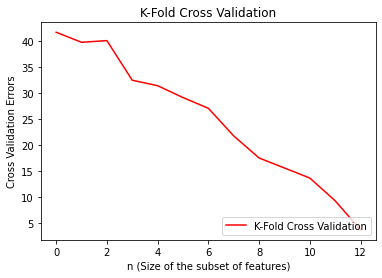

In [ ]:
alpha_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
plt.plot(alpha_values, cross_val_errors, color = 'red', label = 'K-Fold Cross Validation')
plt.legend(loc = "lower right")
plt.title('K-Fold Cross Validation')
plt.xlabel('n (Size of the subset of features)')
plt.ylabel('Cross Validation Errors')
plt.show()

Test Errors :  [40.28554700240819, 38.28411910996786, 39.032228836432864, 31.283321897406747, 30.74518021972303, 28.308718747347065, 26.72115238712919, 20.73541854769294, 16.539887158312503, 15.024010163301377, 13.034430004894672, 8.742846904943605, 3.495909580855215]


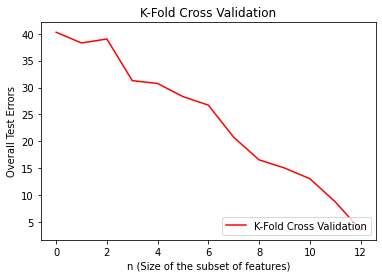

In [ ]:
# Overall Test Errors of S0 to S12

test_errors = list()
test_errors.append(overall_Test_Errors(rmse_test_S0))
test_errors.append(overall_Test_Errors(rmse_test_S1))
test_errors.append(overall_Test_Errors(rmse_test_S2))
test_errors.append(overall_Test_Errors(rmse_test_S3))
test_errors.append(overall_Test_Errors(rmse_test_S4))
test_errors.append(overall_Test_Errors(rmse_test_S5))
test_errors.append(overall_Test_Errors(rmse_test_S6))
test_errors.append(overall_Test_Errors(rmse_test_S7))
test_errors.append(overall_Test_Errors(rmse_test_S8))
test_errors.append(overall_Test_Errors(rmse_test_S9))
test_errors.append(overall_Test_Errors(rmse_test_S10))
test_errors.append(overall_Test_Errors(rmse_test_S11))
test_errors.append(overall_Test_Errors(rmse_test_S12))
print('Test Errors : ', test_errors)

plt.plot(alpha_values, test_errors, color = 'red', label = 'K-Fold Cross Validation')
plt.legend(loc = "lower right")
plt.title('K-Fold Cross Validation')
plt.xlabel('n (Size of the subset of features)')
plt.ylabel('Overall Test Errors')
plt.show()

In [ ]:
# Function to compute Training error and RMSE Training error
def trainingErrorComputation(x):
    Y_train = vectorParametersComputation(x,t_train)
    difference_train = np.subtract(Y_train, t_train)
    training_error = (np.dot(difference_train.T, difference_train))/(len(X_train))
    print('Training Error : ', training_error)
    rmse_training_error = np.sqrt(training_error)
    print('RMSE Training Error : ', rmse_training_error)
    return rmse_training_error

# Function to compute Test error and RMSE Test error
def testErrorComputation(x):
    Y_test = vectorParametersComputation(x,t_test)
    difference_test = np.subtract(Y_test, t_test)
    test_error = (np.dot(difference_test.T, difference_test))/(len(X_test))
    print('Test Error : ', test_error)
    rmse_test_error = np.sqrt(test_error)
    print('RMSE Test Error : ', rmse_test_error)
    return rmse_test_error

def polynomial(d, x, z):
    Xm = np.power(z, d)
    Xdeg = np.append(x, Xm, axis=1)
    return Xdeg

def newArray(x) :
    N = len(x)
    new_Col = np.ones(N)
    return new_Col

new_Col_Addition = newArray(X_train)

In [ ]:
# Choosing polynomial degree of 2 for Basis expansion

X_deg2 = np.insert(X_train, 0, new_Col_Addition, axis=1)
X_train_deg2 = polynomial(2, X_deg2, X_train)
X_train_deg2 = X_train_deg2[:len(X_train)]
Y_train_deg2 = vectorParametersComputation(X_train_deg2, t_train)
rmse_train_error_deg2 = trainingErrorComputation(X_train_deg2)

cross_val_error_deg2 = rmse_train_error_deg2 * (1/K)
print('Cross Validation Error : ', cross_val_error_deg2)

Training Error :  15.658491102303778
RMSE Training Error :  3.9570811341573195
Cross Validation Error :  0.791416226831464


In [ ]:
# Choosing polynomial degree of 3 for Basis expansion

X_train_deg3 = polynomial(3, X_train_deg2, X_train)
X_train_deg3 = X_train_deg3[:len(X_train)]
Y_train_deg3 = vectorParametersComputation(X_train_deg3, t_train)
rmse_train_error_deg3 = trainingErrorComputation(X_train_deg3)
cross_val_error_deg3 = rmse_train_error_deg3 * (1/K)
print('Cross Validation Error : ', cross_val_error_deg3)

Training Error :  21.450283104415405
RMSE Training Error :  4.63144503415677
Cross Validation Error :  0.9262890068313541


In [ ]:
# Choosing polynomial degree of 4 for Basis expansion

X_train_deg4 = polynomial(4, X_train_deg3, X_train)
X_train_deg4 = X_train_deg4[:len(X_train)]
Y_train_deg4 = vectorParametersComputation(X_train_deg4, t_train)
rmse_train_error_deg4 = trainingErrorComputation(X_train_deg4)
cross_val_error_deg4 = rmse_train_error_deg4 * (1/K)
print('Cross Validation Error : ', cross_val_error_deg4)

Training Error :  54.89640227319996
RMSE Training Error :  7.409210637659045
Cross Validation Error :  1.4818421275318092


In [ ]:
# Choosing polynomial degree of 1/2 (or) sqrt for Basis expansion

X_deg_half = np.insert(X_train, 0, new_Col_Addition, axis=1)
X_train_deg_half = polynomial(1/2, X_deg_half, X_train)
X_train_deg_half = X_train_deg_half[:len(X_train)]
Y_train_deg_half = vectorParametersComputation(X_train_deg_half, t_train)
rmse_train_error_deg_half = trainingErrorComputation(X_train_deg_half)
cross_val_error_deg_half = rmse_train_error_deg_half * (1/K)
print('Cross Validation Error : ', cross_val_error_deg_half)

Training Error :  14.768395557359598
RMSE Training Error :  3.842967025276121
Cross Validation Error :  0.7685934050552242


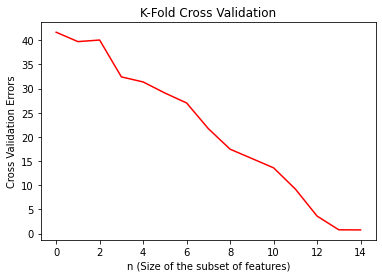

In [ ]:
cross_val_errors.append(cross_val_error_deg2)
cross_val_errors.append(cross_val_error_deg_half)
alpha_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
plt.plot(alpha_values, cross_val_errors, color = 'red')
plt.title('K-Fold Cross Validation')
plt.xlabel('n (Size of the subset of features)')
plt.ylabel('Cross Validation Errors')
plt.show()